# **Automatidata project**
**Regression Analysis: Simplify complex data relationships**

# Building a multiple linear regression model

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
from datetime import datetime
# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
import sklearn.metrics as metrics

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


to explore the data like the datatypes, outliers, missing values, correlation between independent and dependent variables, multicolinearity.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print(df0.shape)

print (df0.info())


(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
print(df0.isna().sum())

df0=df0.drop_duplicates()


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Use `.describe()`.

In [5]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
### YOUR CODE HERE ###

df0[['tpep_pickup_datetime','tpep_dropoff_datetime']].head()


,tpep_pickup_datetime,tpep_dropoff_datetime
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM


In [7]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###

df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() // 60
df0['duration'].head()

0    14.0
1    26.0
2     7.0
3    30.0
4    16.0
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
### YOUR CODE HERE ###

df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

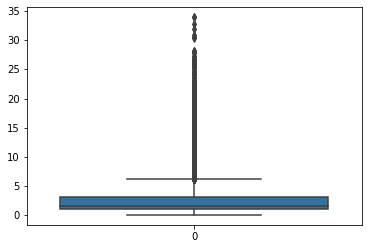

In [ ]:
### YOUR CODE HERE ###

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df0['trip_distance'])
sns.boxplot(ax=axes[1], x=df0['fare_amount'])
sns.boxplot(ax=axes[2], x=df0['duration'])
plt.show();

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

yes, all three variables contains outliers.

yes, some of the distances are zero which can be leave alone.

no, they can be problematic



### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
df0['trip_distance'].sort_values().drop_duplicates().head(10)

22026    0.00
5501     0.01
16827    0.02
21088    0.03
13517    0.04
10146    0.05
14373    0.06
922      0.07
22523    0.08
22035    0.09
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
### YOUR CODE HERE ###
sum(df0['trip_distance']==0)

148

#### `fare_amount` outliers

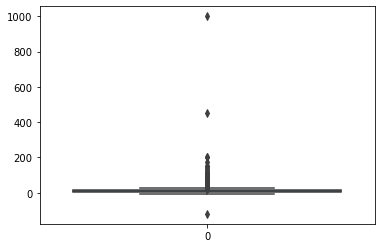

In [ ]:
### YOUR CODE HERE ###
sns.boxplot(data=df0['fare_amount'])
#df0['fare_amount'].describe()

**Question:** What do you notice about the values in the `fare_amount` column?
- the range is large and have negative values, so put 0 to the negative values, and 
Impute values less than $0 with `0`.
- for higher values the standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate, so In this case, we'll use a factor of `6`, which results in a cap of $62.50.

In [14]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###

df0['fare_amount'] = np.where(df0['fare_amount'] < 0,0, df0['fare_amount'] )


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [15]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
'''
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###
        
df0['fare_amount'] = np.where(df0['fare_amount'] < 0,0, df0['fare_amount'] )


        # Calculate upper threshold
     ### YOUR CODE HERE ###
percentile25 = df0['fare_amount'].quantile(0.25)

percentile75 = df0['fare_amount'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 6 * iqr
        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###
    
df0['fare_amount'] = np.where(df0['fare_amount'] > upper_limit,upper_limit, df0['fare_amount'] )


#### `duration` outliers


In [16]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()

count    22699.000000
mean        16.526940
std         61.994905
min        -17.000000
25%          6.000000
50%         11.000000
75%         18.000000
max       1439.000000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [17]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
percentile25 = df0['duration'].quantile(0.25)

percentile75 = df0['duration'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 6 * iqr
df0['duration'] = np.where(df0['duration'] < 0,0, df0['duration'] )

In [18]:
# Impute the high outliers
### YOUR CODE HERE ###
df0['duraion'] = np.where(df0['duration'] > upper_limit,0, df0['duration'] )

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [19]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['DOLocationID']=df0['DOLocationID'].astype('str')
df0['PULocationID']=df0['PULocationID'].astype('str')
df0['pickup_dropoff']=df0['DOLocationID']+' '+df0['PULocationID']
df0['pickup_dropoff'].head()

0    231 100
1     43 186
2    236 262
3     97 188
4      112 4
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [20]:
### YOUR CODE HERE 
group=df0[["pickup_dropoff","trip_distance"]].groupby('pickup_dropoff').mean()
group

,trip_distance
pickup_dropoff,
1 1,2.433333
1 100,16.890000
1 107,15.550000
1 125,14.670000
1 138,32.720000
...,...
97 87,3.300000
97 90,4.620000
97 97,1.006667


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [21]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict=group.to_dict()


# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict=grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [22]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance']=df0['pickup_dropoff'].copy()
# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance']=df0['mean_distance'].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0[['pickup_dropoff','mean_distance']].head()


,pickup_dropoff,mean_distance
0,231 100,3.521667
1,43 186,3.108889
2,236 262,0.881429
3,97 188,3.700000
4,112 4,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [23]:
### YOUR CODE HERE ###
group=df0[["pickup_dropoff","duration"]].groupby('pickup_dropoff').mean()
grouped_dict=group.to_dict()
grouped_dict=grouped_dict['duration']
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
df0['mean_duration']=df0['pickup_dropoff'].copy()
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)


# Confirm that it worked
### YOUR CODE HERE ###
df0[['pickup_dropoff','mean_duration']]

,pickup_dropoff,mean_duration
0,231 100,22.333333
1,43 186,23.666667
2,236 262,6.771429
3,97 188,30.000000
4,112 4,14.000000
...,...,...
22694,186 48,8.142857
22695,164 132,58.875000
22696,234 107,6.151515
22697,144 68,15.875000


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [24]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day']=df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [31]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour']=df0[~df0['day'].isin(['Saturday', 'Sunday'])]['day']
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df0['rush_hour'] = df0['day'].apply(lambda x: 0 if x in ['Saturday', 'Sunday'] else 1)

In [34]:
### YOUR CODE HERE ###
def rush_hourizer(datetime_series, morning_start=6, morning_end=10):
    hours = datetime_series.dt.hour
    is_morning_rush = (hours >= morning_start) & (hours <= morning_end)
    return (is_morning_rush).astype(int)

#df0['rush_hour'] = ((df0['tpep_pickup_datetime'].dt.hour >= 6) & (df0['tpep_pickup_datetime'].dt.hour <= 10)).astype(int)

In [ ]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,duraion,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,14.0,14.0,231 100,3.521667,22.333333,Saturday,March,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,26.0,26.0,43 186,3.108889,23.666667,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,7.0,7.0,236 262,0.881429,6.771429,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,30.0,30.0,97 188,3.700000,30.000000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,16.0,16.0,112 4,4.435000,14.000000,Saturday,April,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.3,12.36,8.0,8.0,236 161,2.052258,11.387097,Saturday,March,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.3,59.16,59.0,59.0,241 79,12.830000,59.000000,Wednesday,May,0
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.3,19.58,21.0,21.0,114 237,4.022500,25.750000,Tuesday,August,0
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.3,9.80,12.0,12.0,249 234,1.019259,7.333333,Saturday,February,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.3,16.55,20.0,20.0,237 239,1.580000,10.066667,Friday,November,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

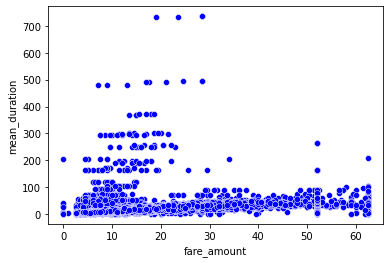

In [ ]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.scatterplot(y='fare_amount',x='mean_duration',data=df0, color='blue')

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [ ]:
### YOUR CODE HERE ###
#duration_counts = df0['mean_duration'].value_counts()

#second_line = df0[df0['mean_duration'] ==duration_counts.index[1]]
#duration_counts.index[1]
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

12.0

Examine the first 30 of these trips.

In [ ]:
# Set pandas to display all columns
### YOUR CODE HERE ###
print("Mean cost values on the second horizontal line:\n")
df0[df0['fare_amount'] ==50].head(30)

Mean cost values on the second horizontal line:



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,duraion,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
17,58691513,2,2017-07-10 13:36:31,2017-07-10 13:48:43,2,1.71,1,N,142,100,...,0.3,10.30,12.0,12.0,100 142,1.622857,12.0,Monday,July,0
201,97717163,2,2017-11-17 22:09:03,2017-11-17 22:29:09,5,1.60,1,N,234,100,...,0.3,13.80,20.0,20.0,100 234,1.155455,12.0,Friday,November,0
328,72377277,2,2017-08-27 22:13:17,2017-08-27 22:23:12,1,2.19,1,N,239,48,...,0.3,14.12,9.0,9.0,48 239,1.683478,12.0,Sunday,August,0
400,47481643,2,2017-06-02 08:56:50,2017-06-02 09:13:21,1,2.12,1,N,113,13,...,0.3,14.80,16.0,16.0,13 113,2.208571,12.0,Friday,June,1
557,36685706,1,2017-05-01 17:38:23,2017-05-01 17:52:12,1,2.20,1,N,137,249,...,0.3,14.75,13.0,13.0,249 137,2.157500,12.0,Monday,May,0
645,37126853,2,2017-05-02 09:50:19,2017-05-02 10:06:40,1,1.06,1,N,13,261,...,0.3,13.56,16.0,16.0,261 13,0.780000,12.0,Tuesday,May,1
996,52460369,1,2017-06-20 18:16:32,2017-06-20 18:32:27,1,2.30,1,N,236,41,...,0.3,15.96,15.0,15.0,41 236,2.120000,12.0,Tuesday,June,0
1039,93709011,2,2017-11-05 15:46:51,2017-11-05 15:51:16,1,0.78,1,N,234,100,...,0.3,5.80,4.0,4.0,100 234,1.155455,12.0,Sunday,November,0
1043,99128352,2,2017-11-22 13:01:52,2017-11-22 13:10:29,1,1.87,1,N,50,90,...,0.3,9.30,8.0,8.0,90 50,1.836000,12.0,Wednesday,November,0
1063,35472703,1,2017-04-10 22:42:24,2017-04-10 22:53:55,1,4.30,1,N,137,88,...,0.3,18.35,11.0,11.0,88 137,4.450000,12.0,Monday,April,0


**Question:** What do you notice about the first 30 trips?

==> almost all of the 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [47]:
### YOUR CODE HERE ###
correlations = df0.corr()['fare_amount'].sort_values(ascending=False)
print(correlations)

fare_amount              1.000000
trip_distance            0.924626
mean_distance            0.910185
duraion                  0.845795
total_amount             0.845757
tolls_amount             0.616719
tip_amount               0.542246
mean_duration            0.379758
RatecodeID               0.222102
duration                 0.171708
extra                    0.097632
improvement_surcharge    0.029979
passenger_count          0.014942
Unnamed: 0               0.013442
VendorID                 0.001045
rush_hour               -0.026991
payment_type            -0.049516
mta_tax                 -0.141438
Name: fare_amount, dtype: float64


In [48]:
### YOUR CODE HERE ###
final_df=df0[['fare_amount','trip_distance','mean_distance','duraion']]

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

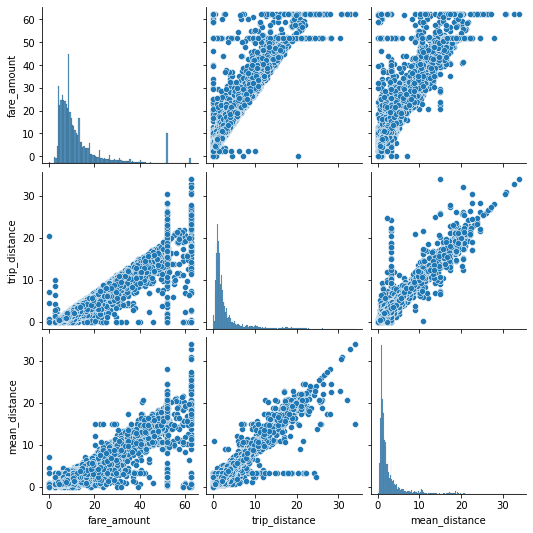

In [49]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(final_df[['fare_amount','trip_distance','mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [51]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr_matrix = final_df.corr()

Visualize a correlation heatmap of the data.

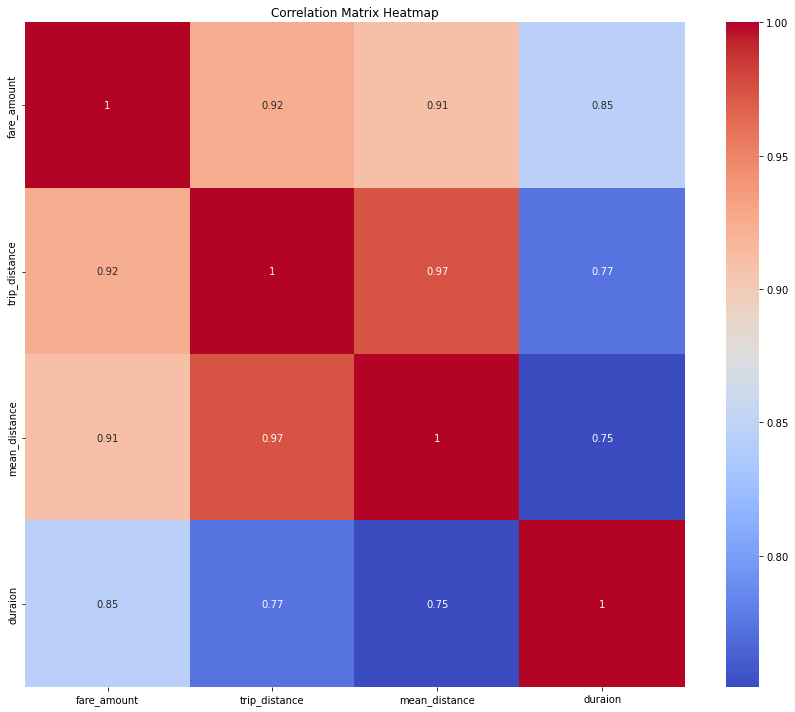

In [53]:
# Create correlation heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [60]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [61]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X = final_df[['trip_distance','mean_distance']]
# Set y variable
### YOUR CODE HERE ###
y = final_df['fare_amount']  
# Display first few rows
### YOUR CODE HERE ###
X.head()

,trip_distance,mean_distance
0,3.34,3.521667
1,1.80,3.108889
2,1.00,0.881429
3,3.70,3.700000
4,4.37,4.435000


### Task 8b. Pre-process data


Dummy encode categorical variables

In [62]:
# Convert VendorID to string
### YOUR CODE HERE ###
df0['VendorID']=df0['VendorID'].astype('str')
# Get dummies
### YOUR CODE HERE ###
df_encoded = pd.get_dummies(df0, columns=['VendorID'], drop_first=True)

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [63]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [66]:
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [64]:
# Fit your model to the training data
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg_model = LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [67]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
reg_model.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [68]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = scaler.fit_transform(X_test)

In [70]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
y_pred = reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 16.56
R² Score: 0.84


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [74]:
# Create a `results` dataframe
### YOUR CODE HERE ###
residuals=y_test.values - y_pred
results=pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Residual': residuals
})
results.head()

,Actual,Predicted,Residual
0,12.5,8.743850,3.756150
1,6.0,8.372812,-2.372812
2,12.0,8.254863,3.745137
3,20.5,21.337175,-0.837175
4,14.0,17.400723,-3.400723


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

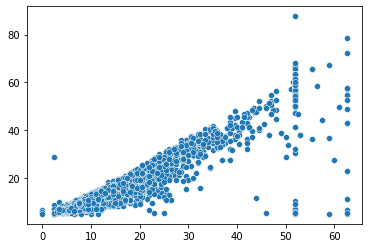

In [76]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###

sns.scatterplot(x=y_test.values,y=y_pred)

Visualize the distribution of the `residuals` using a histogram.

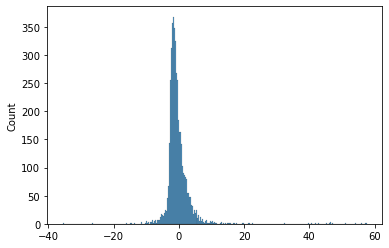

In [77]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(residuals)


In [79]:
# Calculate residual mean
### YOUR CODE HERE ###
resid_mean=residuals.mean()
resid_mean

-0.3816186255380441

Create a scatterplot of `residuals` over `predicted`.

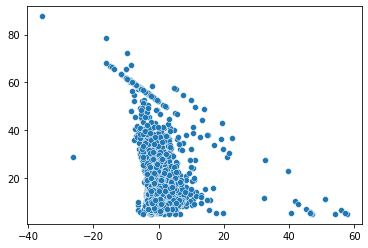

In [80]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.scatterplot(x=residuals,y=y_pred)

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [ ]:
# Output the model's coefficients
coefficients = pd.DataFrame(reg_model.coef_, columns=X.columns)
coefficients


array([7.74542374, 2.15608286])

What do these coefficients mean? How should they be interpreted?

==> these are the beta coefficients that is used to predict the fare amount.

as the train data was standardized with `StandardScaler()` the units are no longer miles. In other words, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13, and the coefficient for mean distance is 2.15 which means if the mean distance incease in one unit the fare amount increases 2.15 dollars.

In [ ]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

Now you can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.

### Task 9d. Conclusion

What results can be presented from this notebook?



linear regression assumptions, the MAE and RMSE scores obtained from the model.